In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 19 16:44:55 2019

@author: jem
"""

#%matplotlib inline

# Exploratory left/right classification using Haar-like feature descriptor



# Face classification using Haar-like feature descripton
import pandas as pd
import sys
from time import time

### for ROC curve metrics
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dask import delayed

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


import os
import numpy as np
from PIL import Image

#directories
main = "/home/dylan/Projects/Tetse_proj/"
data_2 = "/home/dylan/Projects/Tetse_proj/2/"
data_2_small = "/home/dylan/Projects/Tetse_proj/2/2_small/"




In [3]:

df = pd.read_fwf(data_2 + 'refined_data.txt',header=None)
print(len(df))

464


In [4]:
#Read in Label data (result), set wd, test image read-into numpy array


df = pd.read_fwf(data_2 + 'refined_data.txt',header=None)
#?pd.read_fwf
# which function
which = lambda lst:list(np.where(lst)[0])

new = df.iloc[:,4].str.split(" ", n = 23, expand = True)

df= df.drop(labels=4, axis=1)

result = pd.concat([df, new], axis=1, sort=False)

# column numbers were messed up, make them go according to range
result.columns = range(result.shape[1])

result.reset_index(inplace=True, drop=True)


In [5]:

#read in all pictures based on the names in refined_data.txt, 
#resize them to "thumbnails"
#and save them to a hard-coded (for now) folder called 2_small using the same names as the originals
# (so that the labelling doesn't need adjustment)
# we also manually copied refined_data.txt into the 2_small folder for now
#print(os.getcwd())

for x in result.index:
    imgname=" ".join(result.loc[x,[0,1,2]])
    #file, ext = os.path.splitext(imgname)
    im = Image.open(data_2 + imgname)
    im.thumbnail([22,22])    #### CHANGE HERE!!!!  !!!!!! ######
#    os.chdir("Projects/Tetse_proj/2/2_small")   #### 
    im.save(data_2_small + imgname)
##    print(np.as.ndarray(im))
#    os.chdir("..\\")


In [6]:
# make all images greyscale
for x in result.index:
    imgname=" ".join(result.loc[x,[0,1,2]])
#    file, ext = os.path.splitext(imgname)
    img = mpimg.imread(data_2_small + imgname)     
    I = rgb2gray(img)  #make it greyscale
    I8 = (((I-I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8) # the next few lines help us save the images as true greyscale (ie. each image is 2 dimensional)
    greyimg = Image.fromarray(I8)
    rescaledwidth, rescaledheight = np.shape(greyimg)
    greyimg.save(data_2_small  + 'bw/' + imgname)
    #print(np.shape(mpimg.imread(imgname)))


In [8]:
#### creates fullset containing all the pictures
#### access the first picture by fullset[1] 

# get rescaled width and height
imgname=" ".join(result.loc[5,[0,1,2]])
img = mpimg.imread(data_2 + imgname) 
print(np.shape(img))
rescaledwidth, rescaledheight, pix = np.shape(img)
#print(type(rescaledwidth), type(rescaledheight), type(pix))
 
fullset = {}


for i in result.index:
    fullset[i] = mpimg.imread(data_2_small  + " ".join(result.loc[i,[0,1,2]]))

for i in result.index:
    fullset[i]/255.9  # not sure why we do this and what the nan error is about

images = fullset.copy()

#print(type(images[1]))
#print(images[1].shape)

y = np.ndarray([2,3])
#print(type(y))

(1024, 1280, 3)


In [8]:
### create outcome vector y as in the example
### y contains a vector of TRUE and FALSE, TRUE indicates left wings
y= result.loc[:,0]=="A002"
y=np.asarray(y)


TypeError: No matching signature found

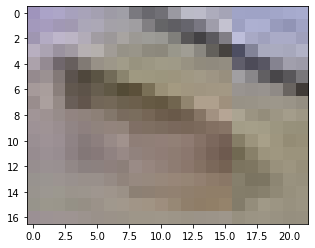

In [9]:
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=None)


#?haar_like_feature

# To speed up the example, extract the two types of features only
feature_types = ['type-4', 'type-2-x', 'type-2-y']

# Build a computation graph using Dask. This allows the use of multiple
# CPU cores later during the actual computation
plt.imshow(images[1])
X = delayed(extract_feature_image(img, feature_types))
print(X.max())